In [2]:
import numpy as np
import sklearn
import pandas as pd
from sklearn import preprocessing
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import torch

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from time import time

In [3]:
# functions.
# grid search
def grid_search_model(X, Y, model, parameters, cv):
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-2)
    CV_model.fit(X, Y)
    CV_model.cv_results_
    print("Best Score:", CV_model.best_score_," / Best parameters:", CV_model.best_params_)

def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):

    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters,cv=cv, scoring='r2',n_jobs=-2)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Validation curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")

    if log==True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r",label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g",label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)
    plt.grid()
    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(loc="best")
    print(parameters)
    print(test_scores_mean)
    return plt

# Learning curve
def Learning_curve_model(X, Y, model, cv, train_sizes):

    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")


    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, scoring='r2', n_jobs=-2, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std  = np.std(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    test_scores_std   = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
    plt.legend(loc="best")
    return 

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [7]:
# load data
df = pd.read_csv("den_dataf1000.csv")

In [10]:
# data pre-processing
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna()
del df['time']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40728 entries, 0 to 40727
Columns: 127 entries, mlat to density
dtypes: float64(127)
memory usage: 39.5 MB


In [11]:
df.describe()

,mlat,cos,sin,rho,ae_index,ae_index_lagged_by_5_minutes,ae_index_lagged_by_10_minutes,ae_index_lagged_by_15_minutes,ae_index_lagged_by_20_minutes,ae_index_lagged_by_25_minutes,ae_index_lagged_by_30_minutes,ae_index_lagged_by_35_minutes,ae_index_lagged_by_40_minutes,ae_index_lagged_by_45_minutes,ae_index_lagged_by_50_minutes,ae_index_lagged_by_55_minutes,ae_index_lagged_by_60_minutes,ae_index_lagged_by_65_minutes,ae_index_lagged_by_70_minutes,ae_index_lagged_by_75_minutes,ae_index_lagged_by_80_minutes,ae_index_lagged_by_85_minutes,ae_index_lagged_by_90_minutes,ae_index_lagged_by_95_minutes,ae_index_lagged_by_100_minutes,ae_index_lagged_by_105_minutes,ae_index_lagged_by_110_minutes,ae_index_lagged_by_115_minutes,ae_index_lagged_by_120_minutes,ae_index_lagged_by_125_minutes,ae_index_lagged_by_130_minutes,ae_index_lagged_by_135_minutes,ae_index_lagged_by_140_minutes,ae_index_lagged_by_145_minutes,ae_index_lagged_by_150_minutes,ae_index_lagged_by_155_minutes,ae_index_lagged_by_160_minutes,ae_index_lagged_by_165_minutes,ae_index_lagged_by_170_minutes,ae_index_lagged_by_175_minutes,ae_index_lagged_by_180_minutes,ae_index_lagged_by_185_minutes,ae_index_lagged_by_190_minutes,ae_index_lagged_by_195_minutes,ae_index_lagged_by_200_minutes,ae_index_lagged_by_205_minutes,ae_index_lagged_by_210_minutes,ae_index_lagged_by_215_minutes,ae_index_lagged_by_220_minutes,ae_index_lagged_by_225_minutes,ae_index_lagged_by_230_minutes,ae_index_lagged_by_235_minutes,ae_index_lagged_by_240_minutes,ae_index_lagged_by_245_minutes,ae_index_lagged_by_250_minutes,ae_index_lagged_by_255_minutes,ae_index_lagged_by_260_minutes,ae_index_lagged_by_265_minutes,ae_index_lagged_by_270_minutes,ae_index_lagged_by_275_minutes,ae_index_lagged_by_280_minutes,ae_index_lagged_by_285_minutes,ae_index_lagged_by_290_minutes,ae_index_lagged_by_295_minutes,ae_index_lagged_by_300_minutes,sym_h,sym_h_lagged_by_5_minutes,sym_h_lagged_by_10_minutes,sym_h_lagged_by_15_minutes,sym_h_lagged_by_20_minutes,sym_h_lagged_by_25_minutes,sym_h_lagged_by_30_minutes,sym_h_lagged_by_35_minutes,sym_h_lagged_by_40_minutes,sym_h_lagged_by_45_minutes,sym_h_lagged_by_50_minutes,sym_h_lagged_by_55_minutes,sym_h_lagged_by_60_minutes,sym_h_lagged_by_65_minutes,sym_h_lagged_by_70_minutes,sym_h_lagged_by_75_minutes,sym_h_lagged_by_80_minutes,sym_h_lagged_by_85_minutes,sym_h_lagged_by_90_minutes,sym_h_lagged_by_95_minutes,sym_h_lagged_by_100_minutes,sym_h_lagged_by_105_minutes,sym_h_lagged_by_110_minutes,sym_h_lagged_by_115_minutes,sym_h_lagged_by_120_minutes,sym_h_lagged_by_125_minutes,sym_h_lagged_by_130_minutes,sym_h_lagged_by_135_minutes,sym_h_lagged_by_140_minutes,sym_h_lagged_by_145_minutes,sym_h_lagged_by_150_minutes,sym_h_lagged_by_155_minutes,sym_h_lagged_by_160_minutes,sym_h_lagged_by_165_minutes,sym_h_lagged_by_170_minutes,sym_h_lagged_by_175_minutes,sym_h_lagged_by_180_minutes,sym_h_lagged_by_185_minutes,sym_h_lagged_by_190_minutes,sym_h_lagged_by_195_minutes,sym_h_lagged_by_200_minutes,sym_h_lagged_by_205_minutes,sym_h_lagged_by_210_minutes,sym_h_lagged_by_215_minutes,sym_h_lagged_by_220_minutes,sym_h_lagged_by_225_minutes,sym_h_lagged_by_230_minutes,sym_h_lagged_by_235_minutes,sym_h_lagged_by_240_minutes,sym_h_lagged_by_245_minutes,sym_h_lagged_by_250_minutes,sym_h_lagged_by_255_minutes,sym_h_lagged_by_260_minutes,sym_h_lagged_by_265_minutes,sym_h_lagged_by_270_minutes,sym_h_lagged_by_275_minutes,sym_h_lagged_by_280_minutes,sym_h_lagged_by_285_minutes,sym_h_lagged_by_290_minutes,sym_h_lagged_by_295_minutes,sym_h_lagged_by_300_minutes,density
count,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.000000,40728.00000

/home/xxl135130/anaconda3/envs/jpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xxl135130/anaconda3/envs/jpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xxl135130/anaconda3/envs/jpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/xxl135130/anaconda3/envs/jpt/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

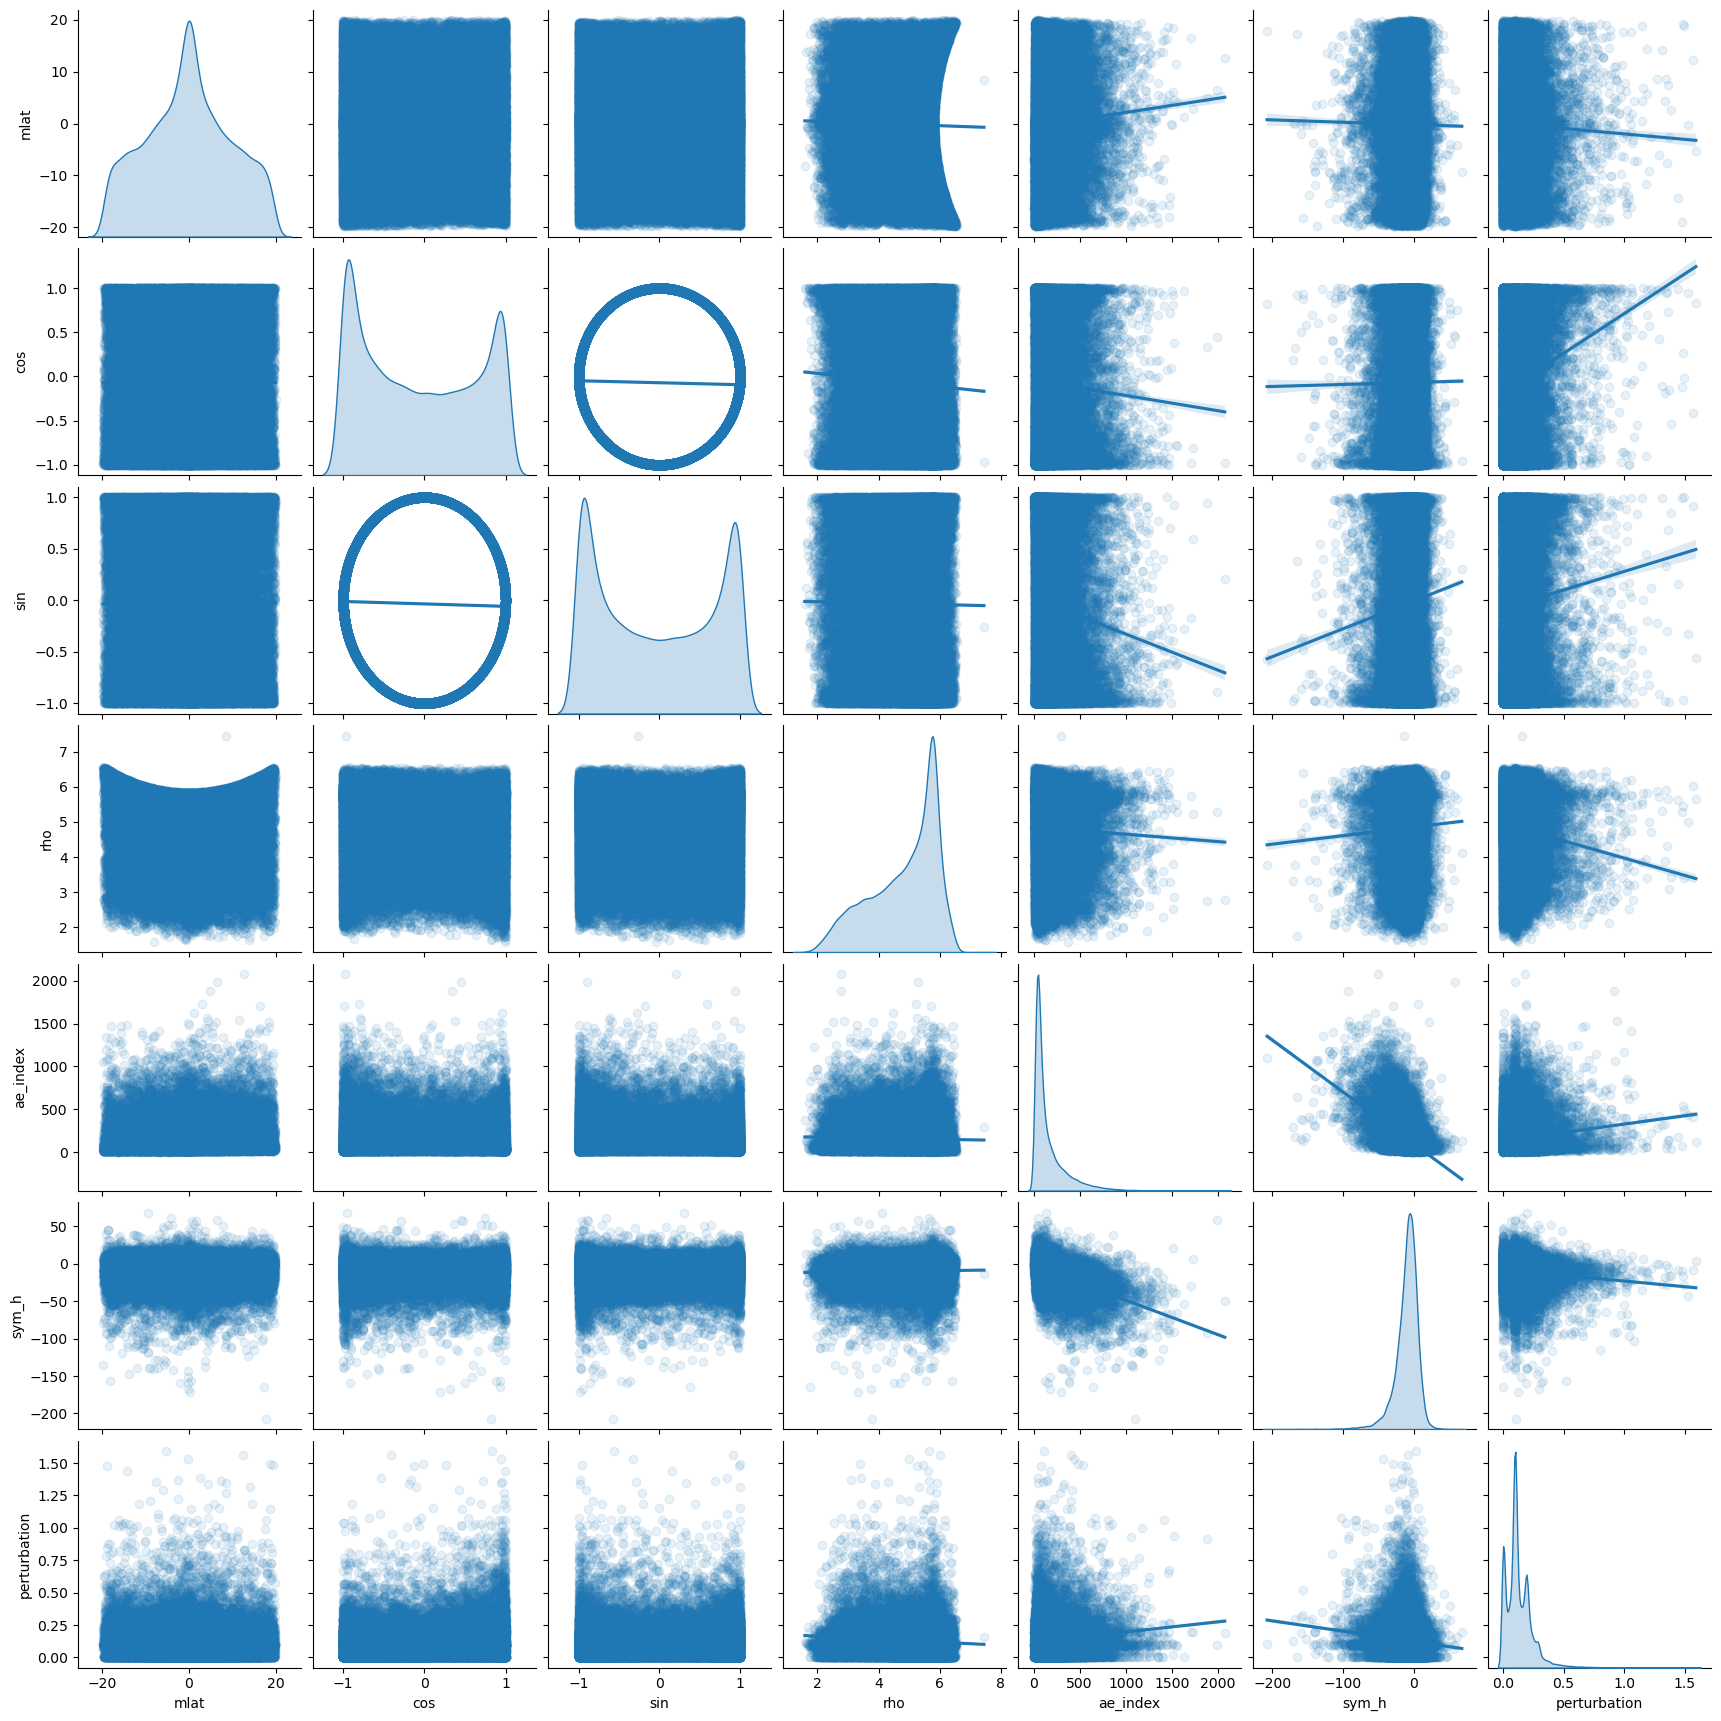

In [6]:
dataset = df.copy()
_ = sns.pairplot(
    dataset[['mlat', 'cos', 'sin', 'rho', 'ae_index', 'sym_h'],
    kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})

In [12]:
X = df[df.columns[0:-1]]  #  X will hold all features
#y = df['theta5']/np.pi # y will hold target/labels
y = np.log10(df['density'])
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 628)

In [19]:
param_grid = dict(hidden_layer_sizes=[4, 8,16,32,64,128,256], activation=['identity', 'logistic', 'tanh', 'relu'])
grid_search_model(X_train, y_train, MLPRegressor(max_iter=1000), param_grid, 5)

Best Score: 0.7732860743356442  / Best parameters: {'activation': 'relu', 'hidden_layer_sizes': 128}


In [20]:
nnc = MLPRegressor(hidden_layer_sizes=128,activation='relu',max_iter=1000)
nnc.fit(X_train, y_train)
nnc_test = nnc.predict(X_test)
nnc_train = nnc.predict(X_train)
print(r2_score(y_train, nnc_train))
print(r2_score(y_test, nnc_test))

0.7803978531740237
0.7730379828913078


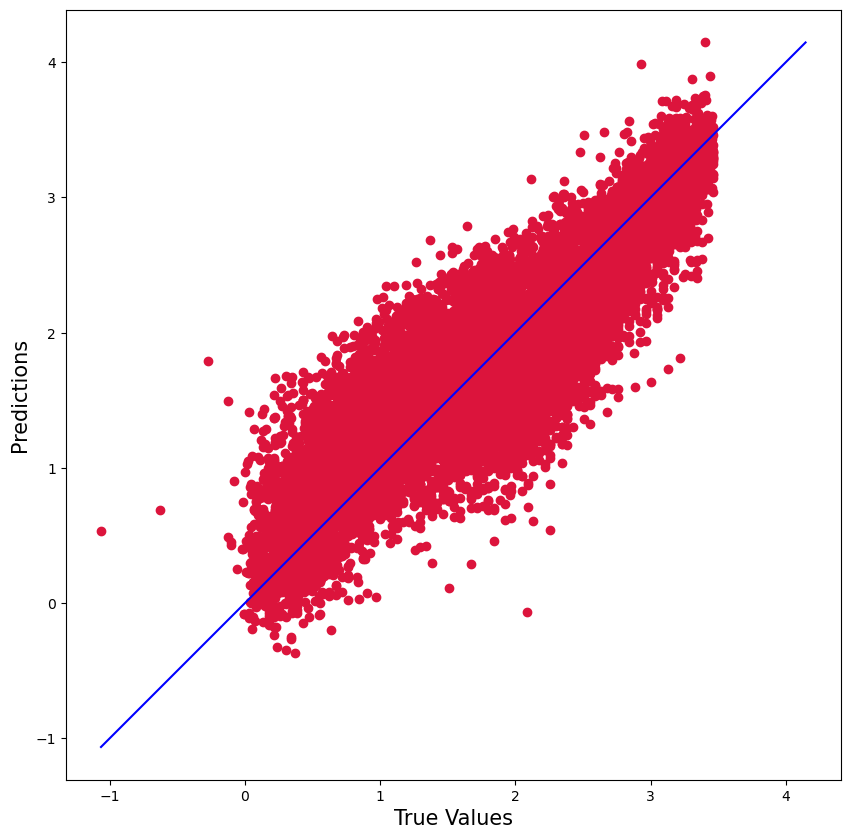

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, nnc_test, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(nnc_test), max(y_test))
p2 = min(min(nnc_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()